# Load Data

In [1]:
import pandas as pd

# Load data utama
df_train = pd.read_csv('mobility_train.csv', parse_dates=['date'])
df_test = pd.read_csv('mobility_test.csv', parse_dates=['date'])

# Tambahkan kolom untuk identifikasi data train/test
df_train['is_train'] = 1
df_test['is_train'] = 0
df_test['trips_thousands'] = None  # Placeholder target

# Gabungkan train dan test untuk preprocessing seragam
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_all.drop(columns=['ID'], inplace=True)

df_all.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_19892\1176541211.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)


,zone_id,date,trips_thousands,is_train
0,Z029,2025-02-24,291.223641,1
1,Z084,2025-01-27,295.244786,1
2,Z103,2025-01-31,312.233743,1
3,Z061,2025-02-26,296.010680,1
4,Z009,2025-01-17,262.210143,1


In [2]:
df_all.dtypes

zone_id                    object
date               datetime64[ns]
trips_thousands           float64
is_train                    int64
dtype: object

# Explonatory Data Analysis

## Merge All Data Frame

### Merge Aktivitas Urban

In [3]:
bisnis = pd.read_csv('Aktivitas_Urban/business_activity.csv')
event = pd.read_csv('Aktivitas_Urban/event_data.csv')
turis = pd.read_csv('Aktivitas_Urban/tourism_data.csv')
traffic = pd.read_csv('Aktivitas_Urban/traffic_data.csv')

list = [bisnis, event, turis, traffic]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 4)
zone_id              object
date                 object
business_density    float64
retail_count        float64
dtype: object
(18000, 4)
zone_id         object
date            object
event_count    float64
event_type      object
dtype: object
(18000, 3)
zone_id            object
date               object
tourist_visits    float64
dtype: object
(18000, 3)
zone_id               object
date                  object
traffic_congestion    object
dtype: object


In [4]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [5]:
dataframes = [
    ("bisnis", bisnis),
    ("event", event),
    ("turis", turis),
    ("traffic", traffic)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


bisnis: datetime64[ns]
event: datetime64[ns]
turis: datetime64[ns]
traffic: datetime64[ns]


In [6]:
# Mulai dari df_all
df_merged = df_all.copy()

# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L


In [7]:
df_merged.nunique()

zone_id                 200
date                     90
trips_thousands       10000
is_train                  2
business_density      11186
retail_count            180
event_count              10
event_type                3
tourist_visits         1000
traffic_congestion        3
dtype: int64

### Merge Cuaca

In [8]:
air = pd.read_csv('Cuaca/air_quality.csv')
weather = pd.read_csv('Cuaca/weather_conditions.csv')

list = [air, weather]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
air_quality_index    float64
dtype: object
(18000, 4)
zone_id           object
date              object
temperature      float64
precipitation    float64
dtype: object


In [9]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [10]:
dataframes = [
    ("air_quality", air),
    ("weather_conditions", weather)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


air_quality: datetime64[ns]
weather_conditions: datetime64[ns]


In [11]:
# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883


### Merge Demografi

Demografi tidak punya date, hanya punya zone_id

In [12]:
edukasi = pd.read_csv('Demografi/education_data.csv')
resident = pd.read_csv('Demografi/resident_data.csv')
workforce = pd.read_csv('Demografi/workforce_data.csv')

demografi = [edukasi, resident, workforce]

for i in demografi:
        df_merged = df_merged.merge(i, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation,education_level,school_count,resident_count,age_group,employment_rate,commute_preference,workforce_size
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN,3.299118,49.0,26396.0,Y,0.842074,B,29489.0
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688,4.640539,44.0,63573.0,A,0.768560,B,32213.0
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451,4.558608,NaN,75591.0,Y,0.624985,B,30766.0
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613,2.284324,12.0,NaN,S,0.785476,B,36910.0
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883,2.789873,40.0,26265.0,Y,0.628162,B,32117.0


### Merge Infrastruktur_Transportasi

In [13]:
bike = pd.read_csv('Infrastruktur_Transportasi/bike_sharing.csv')
parking = pd.read_csv('Infrastruktur_Transportasi/parking_data.csv')
road = pd.read_csv('Infrastruktur_Transportasi/road_network.csv')
transit = pd.read_csv('Infrastruktur_Transportasi/transit_stations.csv')

list = [bike, parking, road, transit]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
bike_availability    float64
dtype: object
(18000, 3)
zone_id              object
date                 object
parking_capacity    float64
dtype: object
(200, 2)
zone_id          object
road_density    float64
dtype: object
(200, 3)
zone_id           object
station_count    float64
transit_type      object
dtype: object


bike_sharing dan parking_data punya zone_id dan date, tapi road_network dan transit_stations hanya punya zone_id

In [14]:
bike['date'] = pd.to_datetime(bike['date'])
parking['date'] = pd.to_datetime(parking['date'])


In [15]:
df_merged = df_merged.merge(bike, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(parking, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(road, on = 'zone_id', how = 'left')
df_merged = df_merged.merge(transit, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,...,resident_count,age_group,employment_rate,commute_preference,workforce_size,bike_availability,parking_capacity,road_density,station_count,transit_type
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,...,26396.0,Y,0.842074,B,29489.0,117.0,316.0,76.884185,10.0,B
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,...,63573.0,A,0.768560,B,32213.0,29.0,303.0,61.890157,8.0,T
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,...,75591.0,Y,0.624985,B,30766.0,84.0,931.0,29.140185,10.0,B
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,...,NaN,S,0.785476,B,36910.0,188.0,455.0,24.544626,9.0,T
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,...,26265.0,Y,0.628162,B,32117.0,67.0,325.0,55.534511,11.0,T


## Distribusi Data

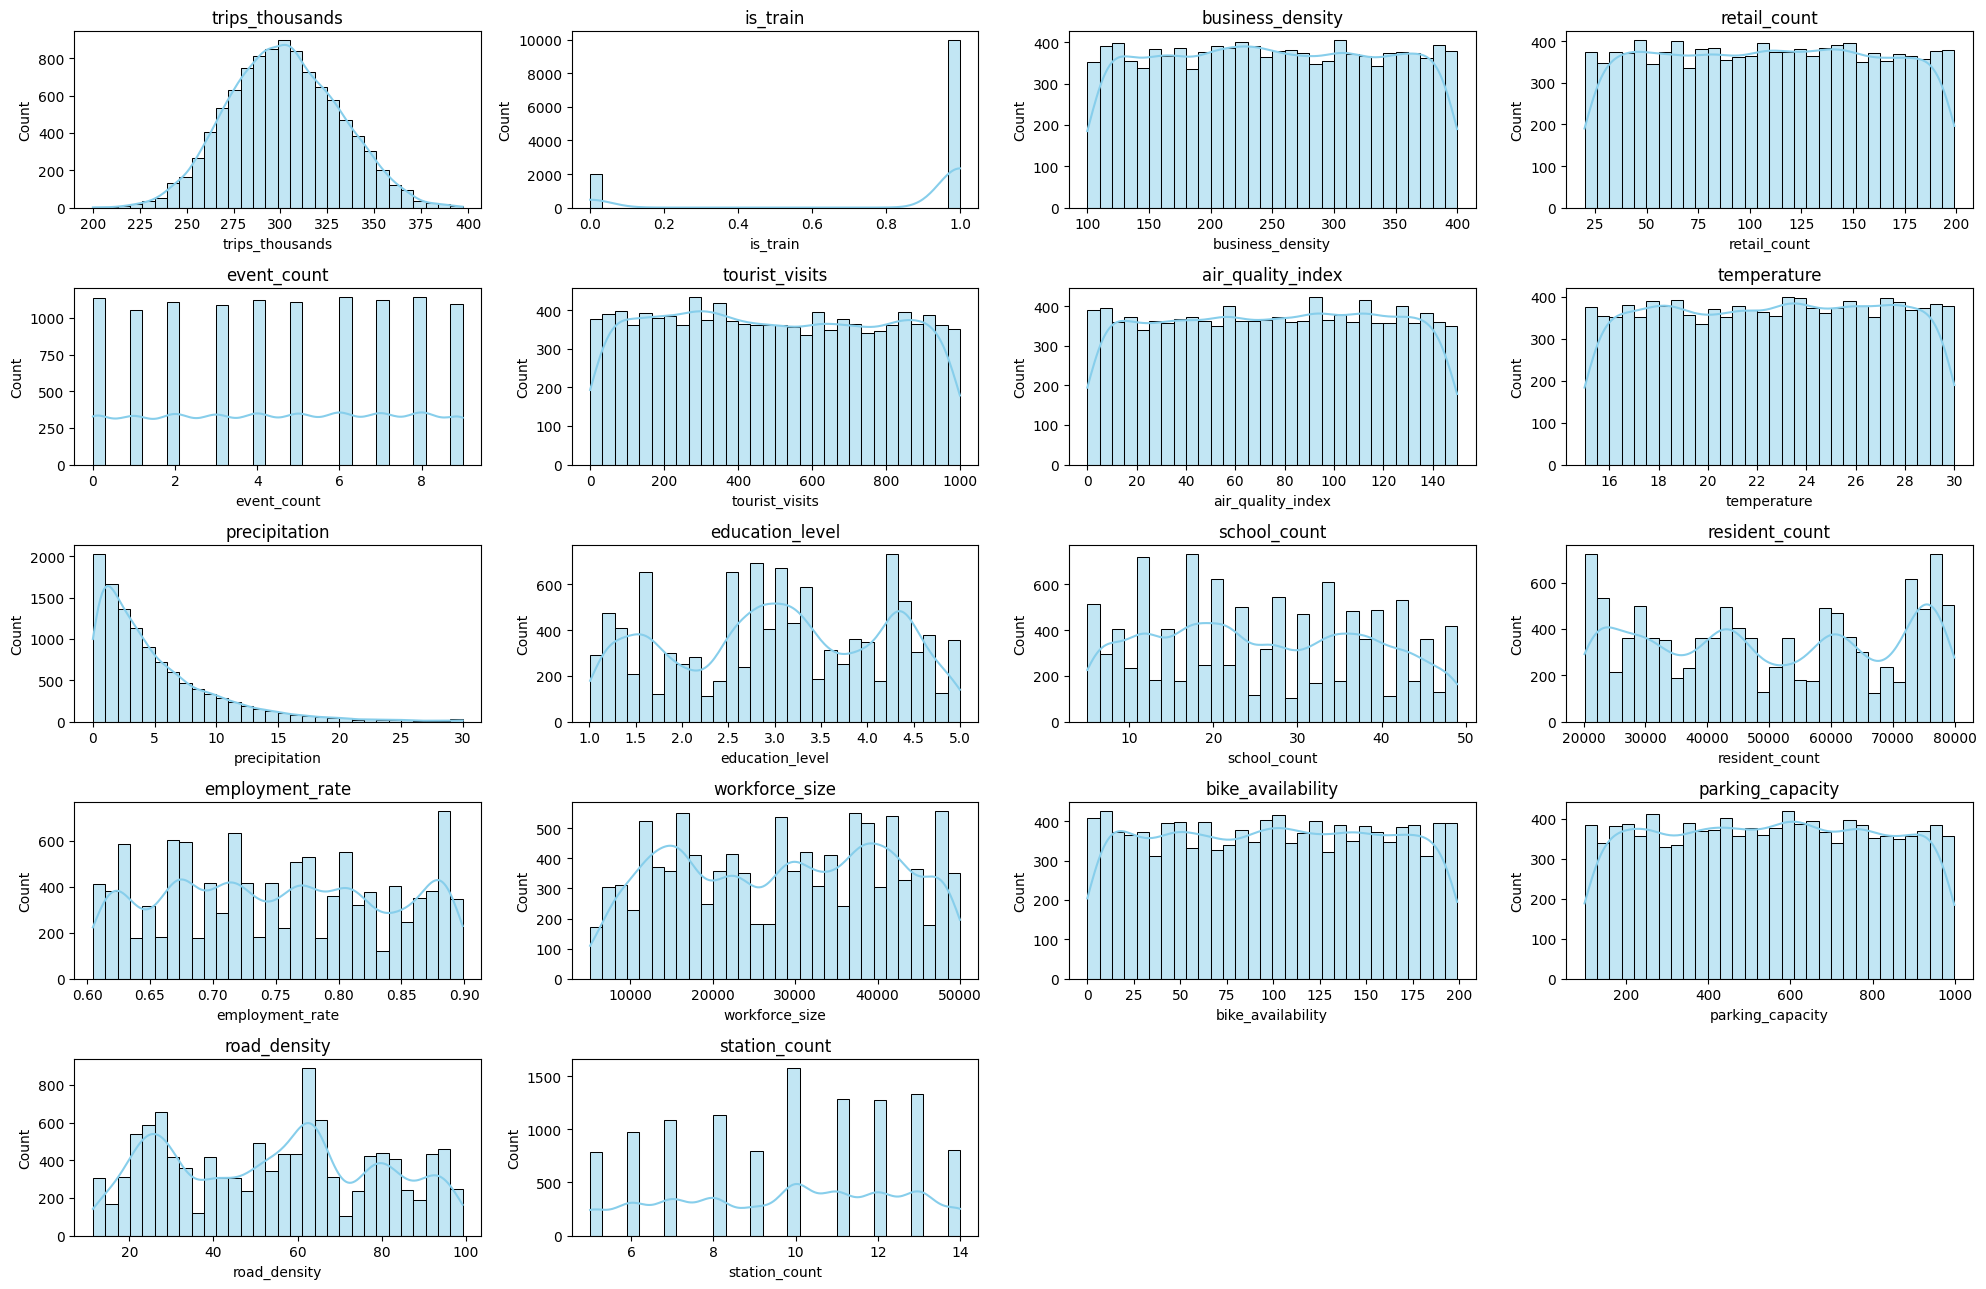

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deteksi kolom numerik otomatis
num_cols = df_merged.select_dtypes(include='number').columns.tolist()

# Plot histogram
plt.figure(figsize=(20, len(num_cols) * 3 // 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, i)
    sns.histplot(df_merged[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Missing and Duplicate Data

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   zone_id             12000 non-null  object        
 1   date                12000 non-null  datetime64[ns]
 2   trips_thousands     10000 non-null  float64       
 3   is_train            12000 non-null  int64         
 4   business_density    11186 non-null  float64       
 5   retail_count        11158 non-null  float64       
 6   event_count         11132 non-null  float64       
 7   event_type          11166 non-null  object        
 8   tourist_visits      11188 non-null  float64       
 9   traffic_congestion  11105 non-null  object        
 10  air_quality_index   11127 non-null  float64       
 11  temperature         11161 non-null  float64       
 12  precipitation       11159 non-null  float64       
 13  education_level     11023 non-null  float64   

In [18]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
school_count          1149
age_group             1089
workforce_size        1048
resident_count         994
education_level        977
station_count          952
commute_preference     911
traffic_congestion     895
air_quality_index      873
event_count            868
parking_capacity       849
retail_count           842
precipitation          841
temperature            839
bike_availability      839
event_type             834
business_density       814
tourist_visits         812
transit_type           767
employment_rate        601
road_density           594
date                     0
zone_id                  0
is_train                 0
dtype: int64


trips_thousands itu dibiarkan null, karena target class. Kalau diisi, nanti mengganggu distribusi data

In [19]:
# 1. Pisahkan dulu fitur numerik selain target
numerical_cols = df_merged.select_dtypes(include=['number']).columns.drop('trips_thousands')

# 2. Isi missing value hanya untuk kolom numerik (kecuali target)
df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

In [20]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
age_group             1089
commute_preference     911
traffic_congestion     895
event_type             834
transit_type           767
zone_id                  0
is_train                 0
date                     0
tourist_visits           0
event_count              0
retail_count             0
business_density         0
precipitation            0
education_level          0
temperature              0
air_quality_index        0
resident_count           0
school_count             0
workforce_size           0
employment_rate          0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
dtype: int64


In [21]:
# Pilih kolom kategorikal (object atau kategori)
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns

# Isi missing value dengan modus
for col in categorical_cols:
    if df_merged[col].isna().any():
        mode_value = df_merged[col].mode()[0]
        df_merged[col] = df_merged[col].fillna(mode_value)

print(df_merged.isna().sum().sort_values(ascending=False))


trips_thousands       2000
zone_id                  0
date                     0
is_train                 0
business_density         0
retail_count             0
event_count              0
event_type               0
tourist_visits           0
traffic_congestion       0
air_quality_index        0
temperature              0
precipitation            0
education_level          0
school_count             0
resident_count           0
age_group                0
employment_rate          0
commute_preference       0
workforce_size           0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
transit_type             0
dtype: int64


In [22]:
df_merged.duplicated().sum()

np.int64(0)

## Encoding

In [23]:
object_cols = df_merged.select_dtypes(include='object').columns

# Tampilkan unique values per kolom
for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())



🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

standard_values = {
    'age_group': ['Young', 'Adult', 'Senior'],
    'commute_preference': ['Bus', 'Train'],
    'event_type': ['Cultural', 'Sports', 'None'],
    'traffic_congestion': ['Low', 'Medium', 'High'],
    'transit_type': ['Bus', 'Train', 'Mixed']
}

<Axes: title={'center': 'Rata-rata trips per zone'}, xlabel='zone_id'>

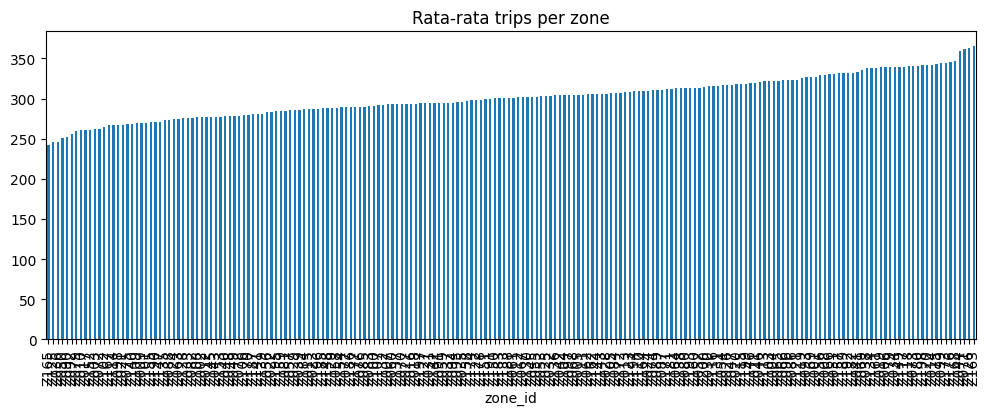

In [24]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values()
zone_mean.plot(kind='bar', figsize=(12, 4), title='Rata-rata trips per zone')

In [25]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values(ascending=False)

print(zone_mean)

zone_id
Z163    365.342880
Z126    363.241272
Z071    361.954133
Z044    359.149613
Z168    346.274665
           ...    
Z090    252.362323
Z050    251.508476
Z036    245.544960
Z125    245.419417
Z165    241.576508
Name: trips_thousands, Length: 200, dtype: float64


In [26]:
print(zone_mean.nunique(), df_merged['zone_id'].nunique())

200 200


In [27]:
# Standardize capitalization
df_merged['age_group'] = df_merged['age_group'].str.upper()
df_merged['commute_preference'] = df_merged['commute_preference'].str.upper()
df_merged['transit_type'] = df_merged['transit_type'].str.upper()

for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())


🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

In [28]:
ordinal_maps = {
    'age_group': {'Y': 0, 'A': 1, 'S': 2, 'a': 1, 's': 2},
    'traffic_congestion': {'L': 0, 'M': 1, 'H': 2}
}
df_merged.replace(ordinal_maps, inplace=True)

df_merged = pd.get_dummies(df_merged, columns=['event_type', 'commute_preference', 'transit_type'])

C:\Users\User\AppData\Local\Temp\ipykernel_19892\2493089103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace(ordinal_maps, inplace=True)


In [29]:
# Mapping dari zone_id ke zone_mean
zone_mean_map = zone_mean.to_dict()

# Buat kolom baru di df_merged
df_merged['zone_mean'] = df_merged['zone_id'].map(zone_mean_map)

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,tourist_visits,traffic_congestion,air_quality_index,...,station_count,event_type_C,event_type_N,event_type_S,commute_preference_B,commute_preference_T,transit_type_B,transit_type_M,transit_type_T,zone_mean
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,858.0,0,127.735031,...,10.0,False,True,False,True,False,True,False,False,286.126812
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,319.0,1,46.175101,...,8.0,False,True,False,True,False,False,False,True,307.282911
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,375.0,1,30.457095,...,10.0,False,True,False,True,False,True,False,False,321.654426
3,Z061,2025-02-26,296.010680,1,249.451003,107.0,8.0,797.0,0,118.442864,...,9.0,False,True,False,True,False,False,False,True,301.264703
4,Z009,2025-01-17,262.210143,1,135.967328,110.0,7.0,149.0,0,2.988478,...,11.0,False,True,False,True,False,False,False,True,269.668344


## Outlier

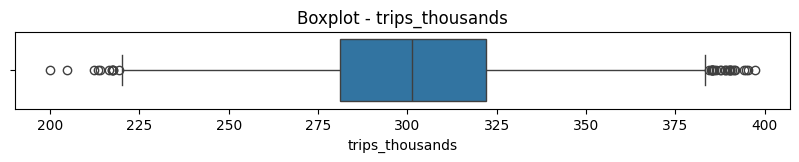

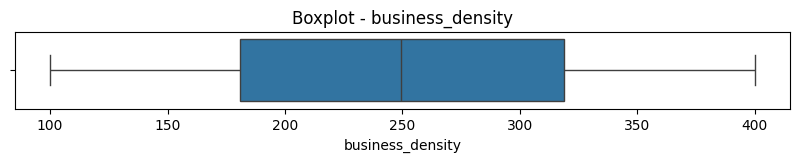

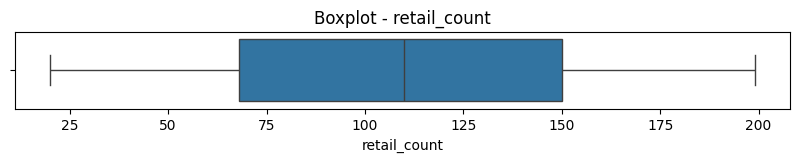

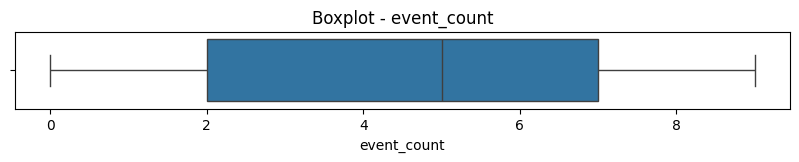

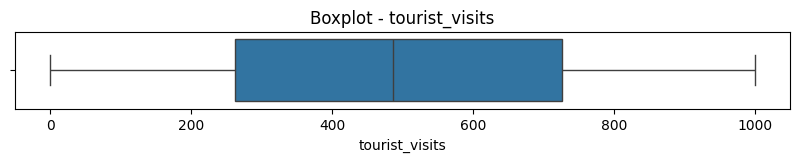

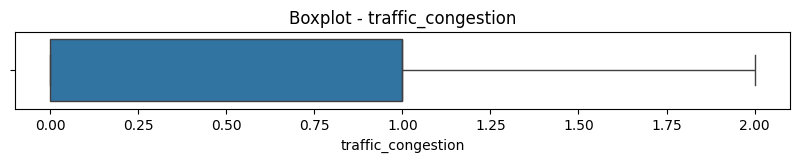

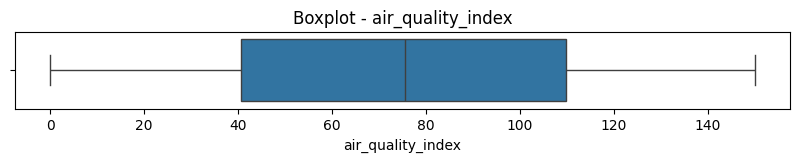

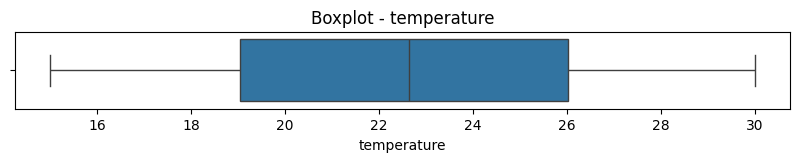

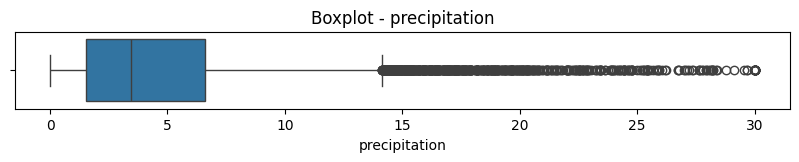

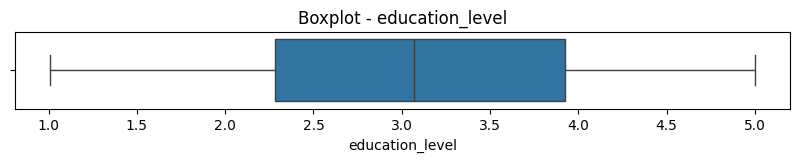

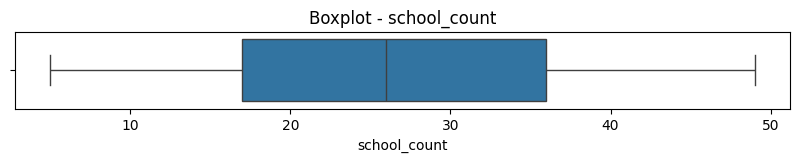

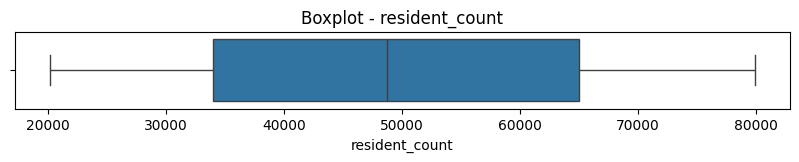

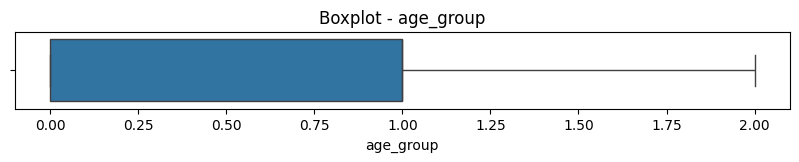

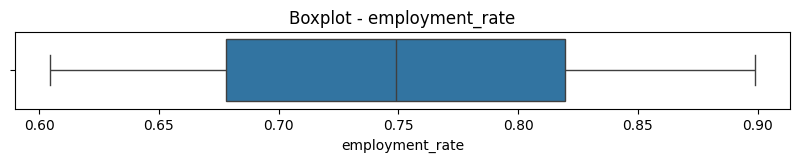

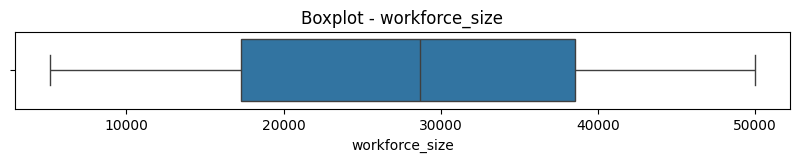

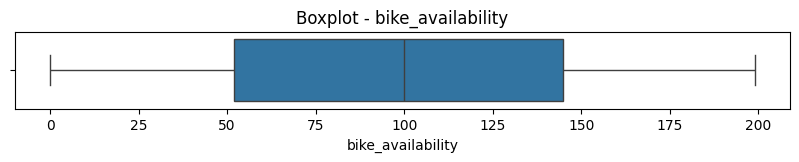

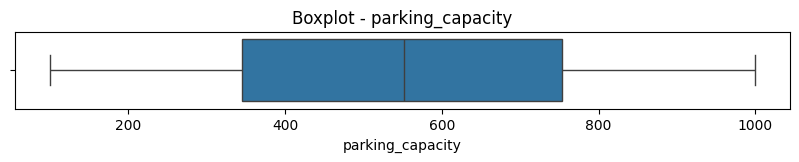

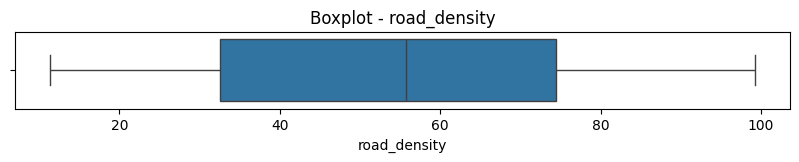

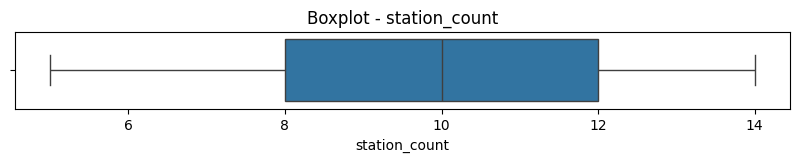

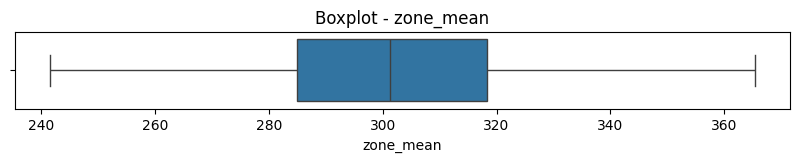

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns.drop('is_train')

for col in numerical_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot - {col}')
    plt.show()


In [31]:
# Statistik IQR untuk deteksi outlier
def check_outlier_stats(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

for col in numerical_cols:
    check_outlier_stats(df_merged, col)


trips_thousands: 36 outliers
business_density: 0 outliers
retail_count: 0 outliers
event_count: 0 outliers
tourist_visits: 0 outliers
traffic_congestion: 0 outliers
air_quality_index: 0 outliers
temperature: 0 outliers
precipitation: 673 outliers
education_level: 0 outliers
school_count: 0 outliers
resident_count: 0 outliers
age_group: 0 outliers
employment_rate: 0 outliers
workforce_size: 0 outliers
bike_availability: 0 outliers
parking_capacity: 0 outliers
road_density: 0 outliers
station_count: 0 outliers
zone_mean: 0 outliers


### Precipitation

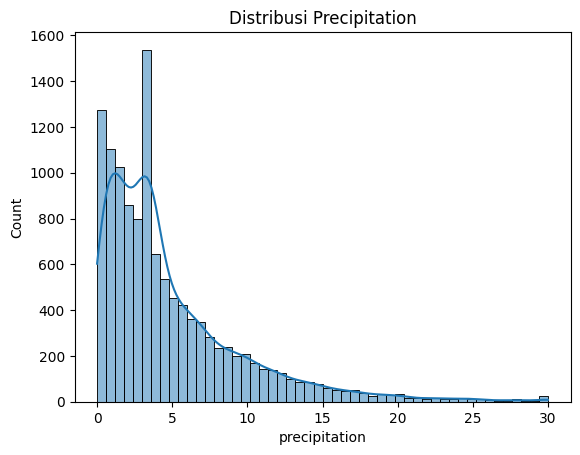

In [32]:
# Cek distribusi precipitation
import numpy as np
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation")
plt.show()


In [33]:
# STEP 1: Salin data mentah (SEBELUM clipping apapun!)
before_clip = df_merged['precipitation'].copy()

# STEP 2: Hitung batas bawah & atas dari data mentah
q_low = before_clip.quantile(0.01)
q_high = before_clip.quantile(0.99)

# STEP 3: Clipping (Winsorize) dari data mentah
df_merged['precipitation'] = before_clip.clip(q_low, q_high)

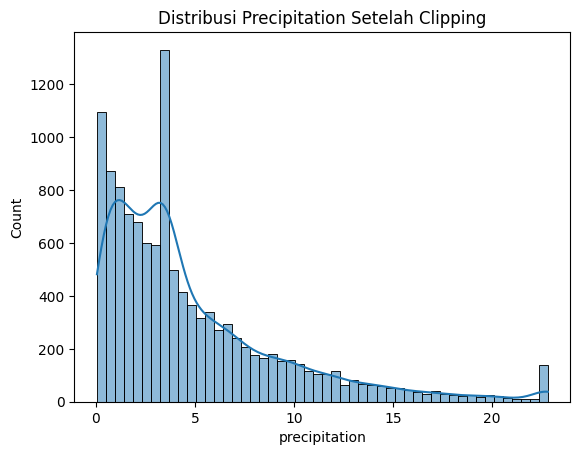

In [34]:
# STEP 4: Cek distribusi setelah clipping
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation Setelah Clipping")
plt.show()

In [35]:
# 5. Validasi hasil clipping
print("Jumlah outlier sebelum clipping:", (before_clip > q_high).sum())
print("Jumlah outlier sesudah clipping:", (df_merged['precipitation'] > q_high).sum())
print("Nilai maksimum sekarang:", df_merged['precipitation'].max())

Jumlah outlier sebelum clipping: 120
Jumlah outlier sesudah clipping: 0
Nilai maksimum sekarang: 22.812521822732737


### Trips Thousands

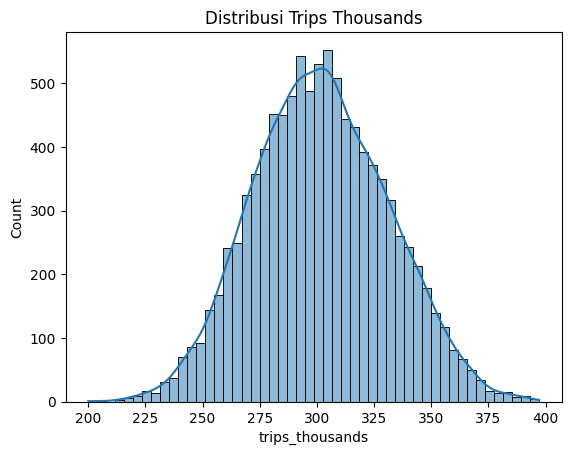

In [36]:
# Cek distribusi trips_thousands
import numpy as np
sns.histplot(df_merged['trips_thousands'], bins=50, kde=True)
plt.title("Distribusi Trips Thousands")
plt.show()

## Correlation

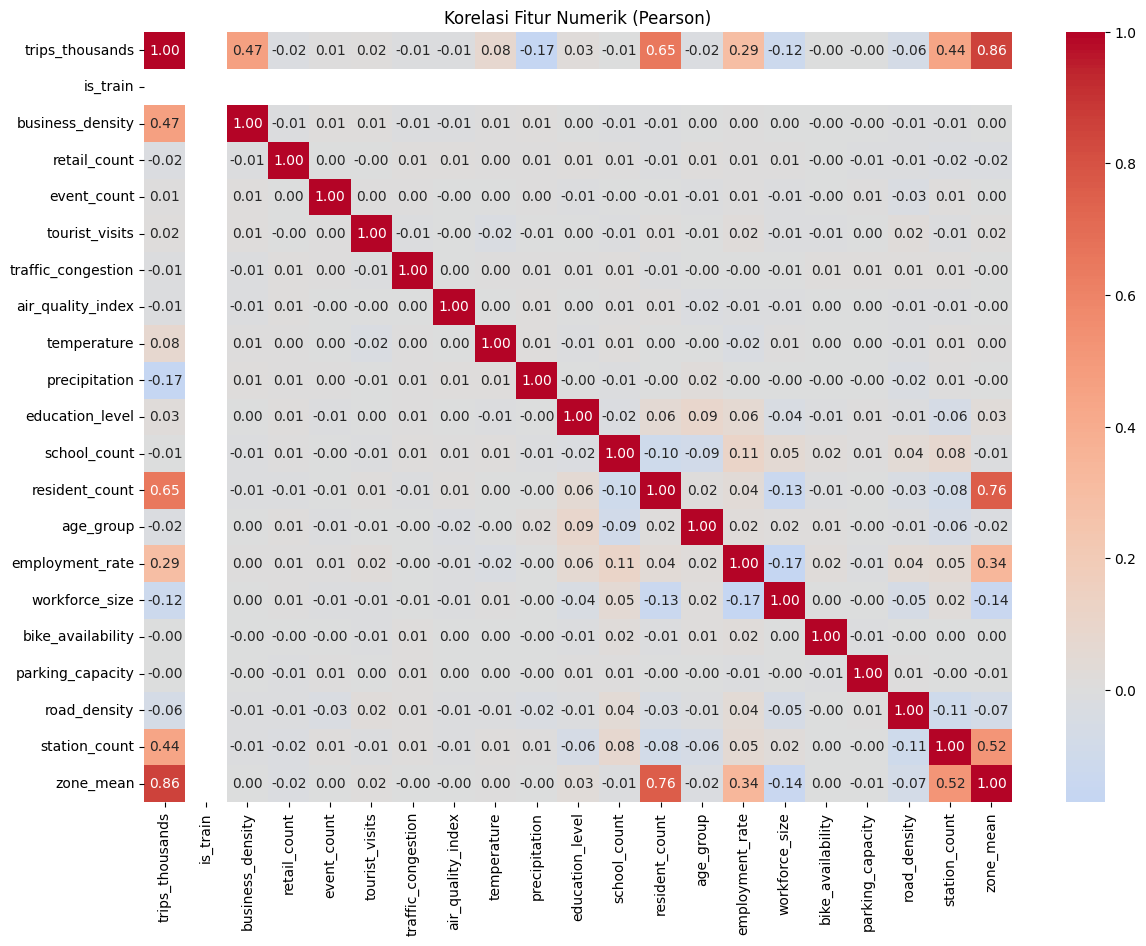

In [37]:
# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_merged[df_merged['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [38]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)


Korelasi fitur terhadap trips_thousands:
trips_thousands       1.000000
zone_mean             0.857663
resident_count        0.651651
business_density      0.465014
station_count         0.443770
employment_rate       0.294374
temperature           0.079426
education_level       0.025483
tourist_visits        0.016456
event_count           0.007780
bike_availability    -0.002879
parking_capacity     -0.004405
school_count         -0.005616
traffic_congestion   -0.006620
air_quality_index    -0.007123
age_group            -0.015503
retail_count         -0.019344
road_density         -0.063550
workforce_size       -0.119147
precipitation        -0.170321
is_train                   NaN
Name: trips_thousands, dtype: float64


## Feature Engineering

In [39]:
df_feature_eng = df_merged.copy()

df_feature_eng['day_of_week_sin'] = np.sin(2 * np.pi * df_feature_eng['date'].dt.dayofweek / 7)
df_feature_eng['day_of_week_cos'] = np.cos(2 * np.pi * df_feature_eng['date'].dt.dayofweek / 7)
df_feature_eng['trips_lag7'] = df_feature_eng.groupby('zone_id')['trips_thousands'].shift(7)
df_feature_eng['bad_weather_business'] = (df_feature_eng['precipitation'] > 5) & (df_feature_eng['business_density'] > df_feature_eng['business_density'].median())
df_feature_eng['transit_per_resident'] = df_feature_eng['station_count'] / (df_feature_eng['resident_count'] + 1)

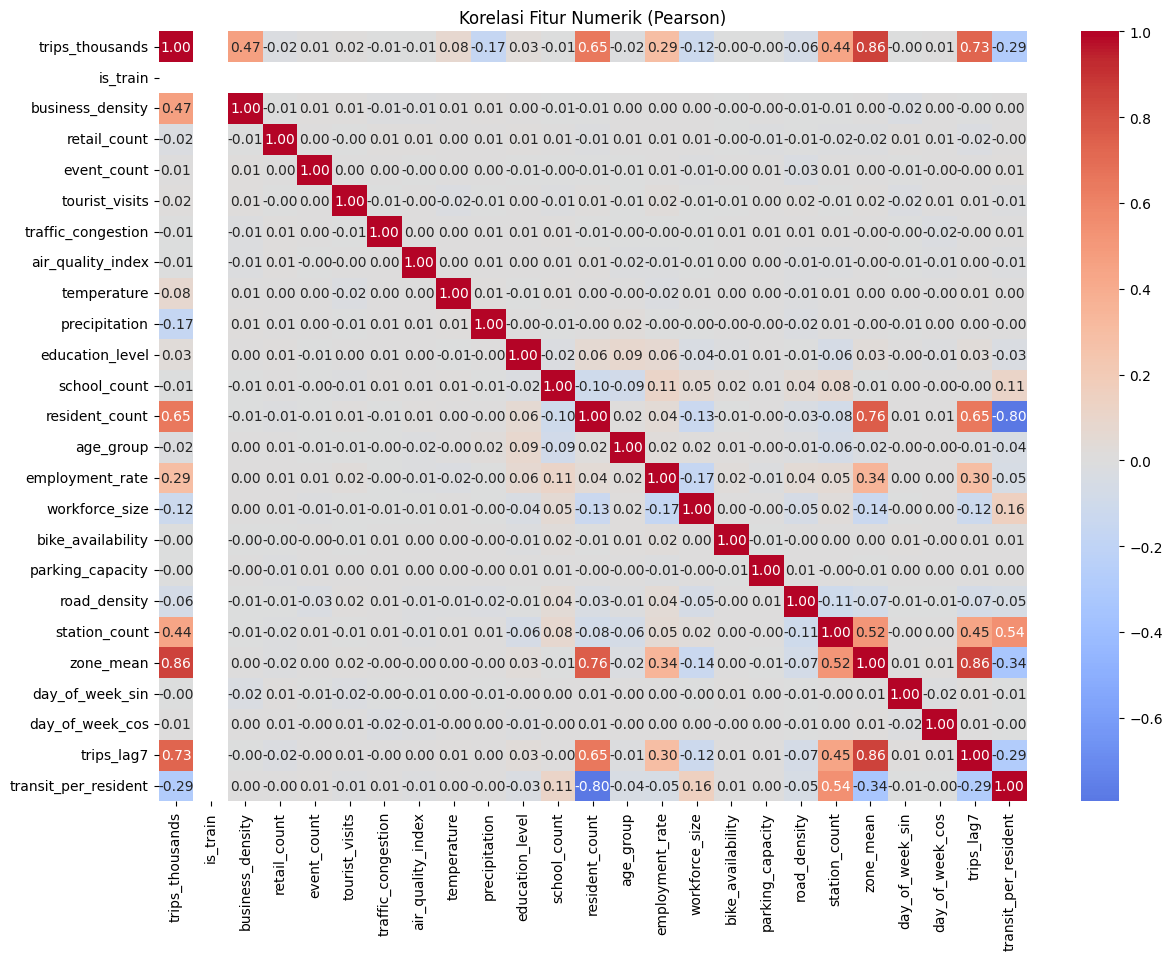

In [40]:
# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_feature_eng[df_feature_eng['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [41]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)

Korelasi fitur terhadap trips_thousands:
trips_thousands         1.000000
zone_mean               0.857663
trips_lag7              0.731864
resident_count          0.651651
business_density        0.465014
station_count           0.443770
employment_rate         0.294374
temperature             0.079426
education_level         0.025483
tourist_visits          0.016456
day_of_week_cos         0.011025
event_count             0.007780
bike_availability      -0.002879
day_of_week_sin        -0.003540
parking_capacity       -0.004405
school_count           -0.005616
traffic_congestion     -0.006620
air_quality_index      -0.007123
age_group              -0.015503
retail_count           -0.019344
road_density           -0.063550
workforce_size         -0.119147
precipitation          -0.170321
transit_per_resident   -0.289544
is_train                     NaN
Name: trips_thousands, dtype: float64


In [42]:
for lag in [3, 7, 14]:
    df_feature_eng[f'trips_lag{lag}'] = df_feature_eng.groupby('zone_id')['trips_thousands'].shift(lag)

df_feature_eng['resident_per_station'] = df_feature_eng['resident_count'] / (df_feature_eng['station_count'] + 1)
df_feature_eng['station_utilization'] = df_feature_eng['trips_lag7'] / (df_feature_eng['station_count'] + 1)

df_feature_eng['weekend_business'] = (df_feature_eng['day_of_week_cos'] < -0.5) * df_feature_eng['business_density']

df_feature_eng['high_emp_mobility'] = (df_feature_eng['employment_rate'] > 0.7) * df_feature_eng['trips_lag7']

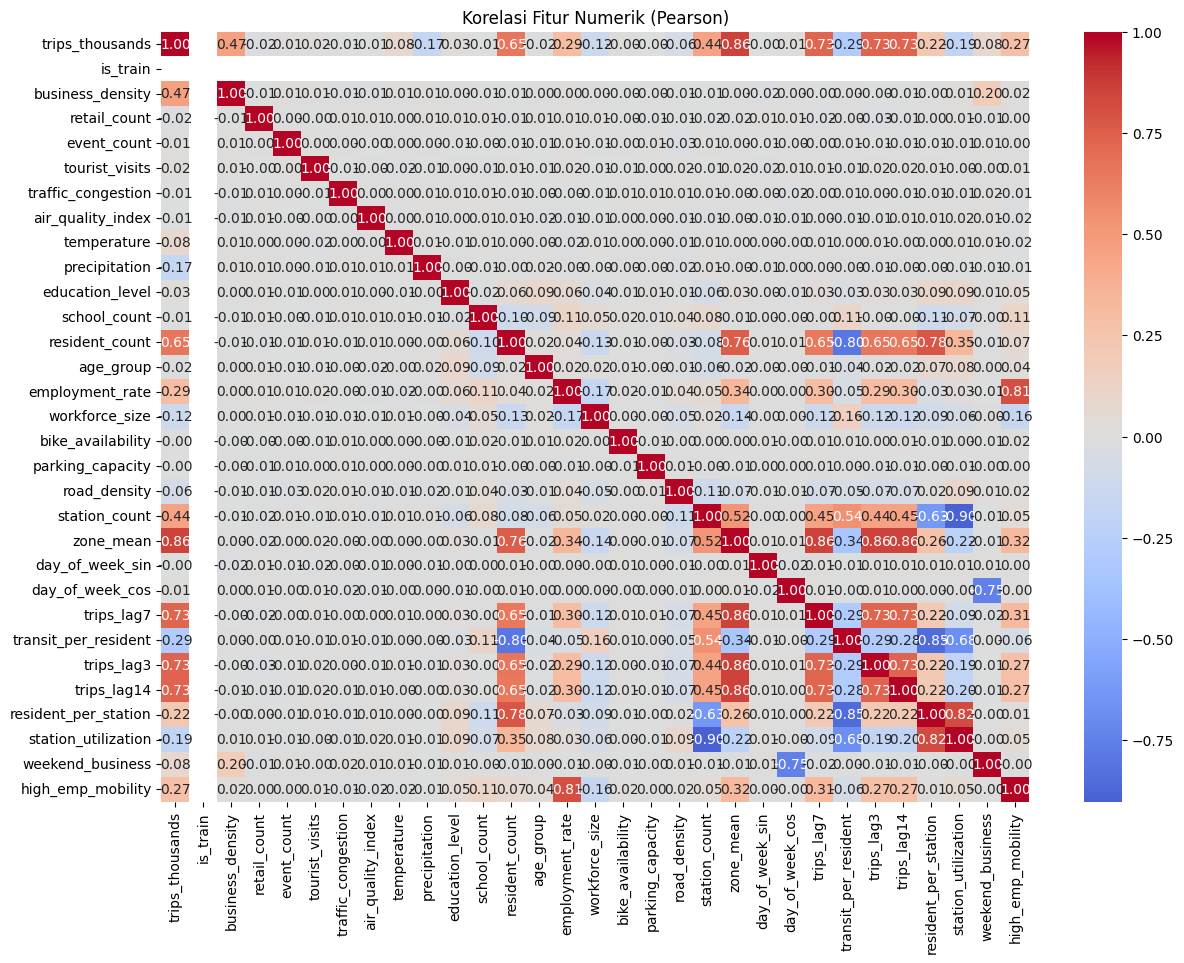

In [43]:
# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_feature_eng[df_feature_eng['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [44]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)

Korelasi fitur terhadap trips_thousands:
trips_thousands         1.000000
zone_mean               0.857663
trips_lag3              0.733427
trips_lag14             0.733271
trips_lag7              0.731864
resident_count          0.651651
business_density        0.465014
station_count           0.443770
employment_rate         0.294374
high_emp_mobility       0.273995
resident_per_station    0.220728
weekend_business        0.080803
temperature             0.079426
education_level         0.025483
tourist_visits          0.016456
day_of_week_cos         0.011025
event_count             0.007780
bike_availability      -0.002879
day_of_week_sin        -0.003540
parking_capacity       -0.004405
school_count           -0.005616
traffic_congestion     -0.006620
air_quality_index      -0.007123
age_group              -0.015503
retail_count           -0.019344
road_density           -0.063550
workforce_size         -0.119147
precipitation          -0.170321
station_utilization    -0.190557
tr

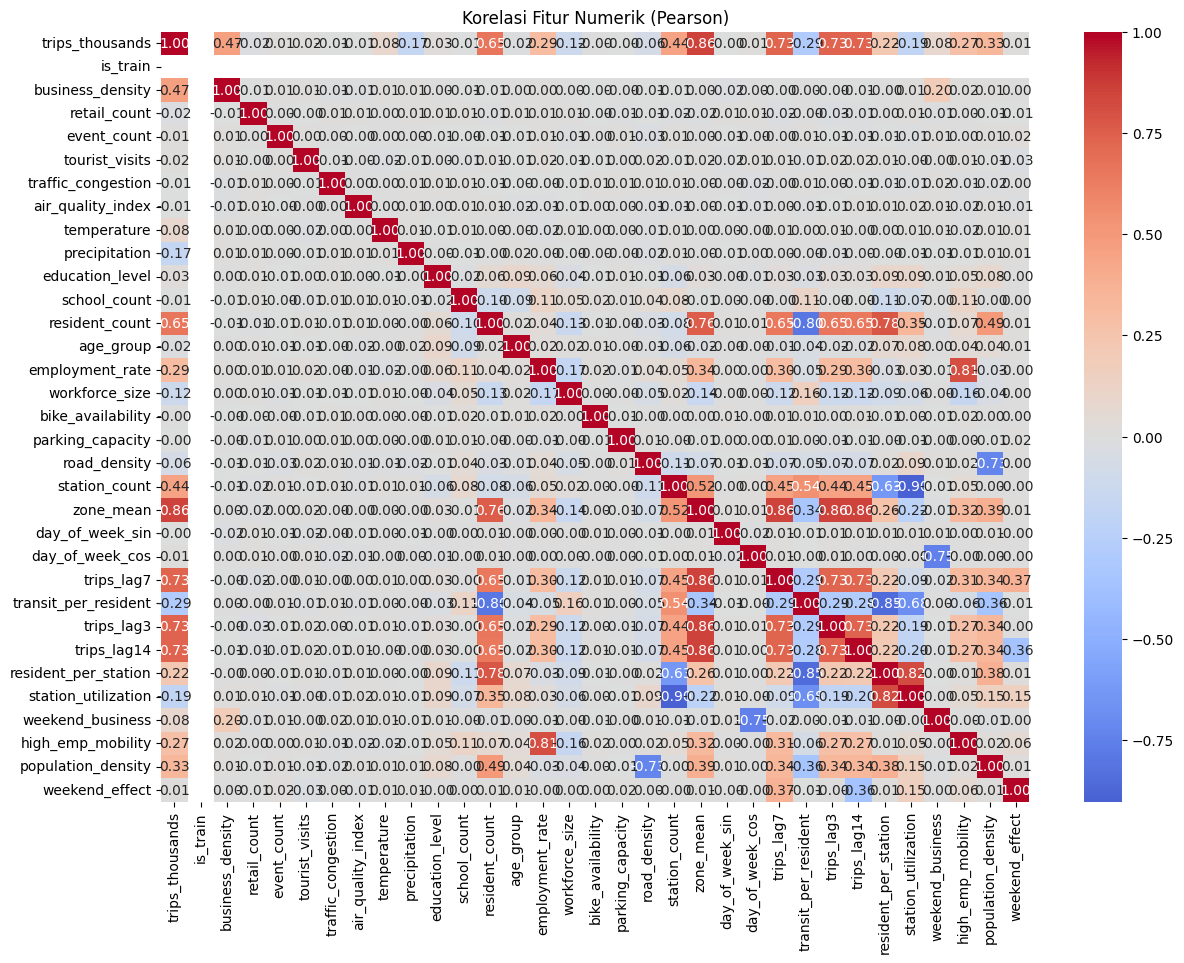

In [45]:
df_feature_eng['population_density'] = df_feature_eng['resident_count'] / df_feature_eng['road_density']
df_feature_eng['weekend_effect'] = df_feature_eng['trips_lag7'] - df_feature_eng['trips_lag14']

# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_feature_eng[df_feature_eng['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [46]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)

Korelasi fitur terhadap trips_thousands:
trips_thousands         1.000000
zone_mean               0.857663
trips_lag3              0.733427
trips_lag14             0.733271
trips_lag7              0.731864
resident_count          0.651651
business_density        0.465014
station_count           0.443770
population_density      0.333014
employment_rate         0.294374
high_emp_mobility       0.273995
resident_per_station    0.220728
weekend_business        0.080803
temperature             0.079426
education_level         0.025483
tourist_visits          0.016456
day_of_week_cos         0.011025
event_count             0.007780
weekend_effect          0.007443
bike_availability      -0.002879
day_of_week_sin        -0.003540
parking_capacity       -0.004405
school_count           -0.005616
traffic_congestion     -0.006620
air_quality_index      -0.007123
age_group              -0.015503
retail_count           -0.019344
road_density           -0.063550
workforce_size         -0.119147
pr

In [47]:
corr_matrix.corr()

,trips_thousands,is_train,business_density,retail_count,event_count,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation,...,trips_lag7,transit_per_resident,trips_lag3,trips_lag14,resident_per_station,station_utilization,weekend_business,high_emp_mobility,population_density,weekend_effect
trips_thousands,1.000000,NaN,0.304426,-0.157508,-0.094628,-0.049925,-0.119384,-0.104319,-0.018829,-0.263551,...,0.920193,-0.426564,0.943662,0.927864,0.307900,-0.197493,0.042464,0.453410,0.595140,-0.101362
is_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_density,0.304426,NaN,1.000000,-0.067191,-0.017539,-0.021198,-0.068086,-0.068753,-0.006757,-0.092136,...,0.002628,0.000010,0.016218,0.022134,-0.013930,-0.037671,0.294153,-0.012894,0.012285,-0.042861
retail_count,-0.157508,NaN,-0.067191,1.000000,-0.027611,-0.040903,-0.001203,-0.005235,-0.028787,-0.005285,...,-0.161670,0.052033,-0.153782,-0.132321,-0.046542,0.022862,-0.038637,-0.090583,-0.080276,-0.051433
event_count,-0.094628,NaN,-0.017539,-0.027611,1.000000,-0.024079,-0.022192,-0.039188,-0.032504,-0.018757,...,-0.105292,0.071369,-0.102013,-0.099146,-0.069706,-0.031128,0.002853,-0.077482,-0.046907,0.004539
tourist_visits,-0.049925,NaN,-0.021198,-0.040903,-0.024079,1.000000,-0.046611,-0.035891,-0.086285,-0.041481,...,-0.067113,0.004219,-0.044255,-0.030951,-0.010103,0.003200,-0.017345,-0.037602,-0.050062,-0.087967
traffic_congestion,-0.119384,NaN,-0.068086,-0.001203,-0.022192,-0.046611,1.000000,-0.024341,-0.028484,-0.011730,...,-0.117777,0.072506,-0.104784,-0.100677,-0.076971,-0.032932,0.026866,-0.106079,-0.091805,-0.032526
air_quality_index,-0.104319,NaN,-0.068753,-0.005235,-0.039188,-0.035891,-0.024341,1.000000,-0.033033,-0.004488,...,-0.102024,0.004528,-0.093526,-0.069365,-0.001886,0.032350,0.001093,-0.111727,-0.019251,-0.063985
temperature,-0.018829,NaN,-0.006757,-0.028787,-0.032504,-0.086285,-0.028484,-0.033033,1.000000,-0.013022,...,-0.065758,0.035016,-0.058043,-0.058952,-0.034729,-0.013492,0.003371,-0.107859,-0.016778,-0.019473
precipitation,-0.263551,NaN,-0.092136,-0.005285,-0.018757,-0.041481,-0.011730,-0.004488,-0.013022,1.000000,...,-0.152734,0.067608,-0.155024,-0.140863,-0.061992,0.006657,-0.032200,-0.119576,-0.064110,-0.014970


In [48]:
# 1. Buang kolom yang tidak diperlukan
drop_cols = ['trips_thousands', 'is_train']
features = df_feature_eng.drop(columns=drop_cols)

# 2. Hanya pilih fitur numerik
features = features.select_dtypes(include=['number'])

# ✅ 3. Bersihkan nilai NaN dan infinite
features_clean = features.replace([np.inf, -np.inf], np.nan).dropna()

# 4. Tambahkan konstanta
from statsmodels.tools.tools import add_constant
X_vif = add_constant(features_clean)

# 5. Hitung VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# 6. Tampilkan
print(vif_data.sort_values(by="VIF", ascending=False))


                 Feature          VIF
25           trips_lag14          inf
31        weekend_effect          inf
22            trips_lag7          inf
0                  const  4732.006926
19             zone_mean   160.731546
11        resident_count   146.038966
18         station_count    78.422920
26  resident_per_station    56.549359
27   station_utilization    46.100113
13       employment_rate    13.662902
23  transit_per_resident    10.714596
30    population_density     4.195925
24            trips_lag3     3.809661
17          road_density     3.205670
29     high_emp_mobility     3.110023
28      weekend_business     2.506726
21       day_of_week_cos     2.404966
1       business_density     1.119678
10          school_count     1.082622
14        workforce_size     1.082259
9        education_level     1.042856
12             age_group     1.040417
3            event_count     1.005152
8          precipitation     1.004959
7            temperature     1.004777
15     bike_

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [49]:
# Daftar fitur yang akan dibuang karena multikolinearitas tinggi
drop_vif_cols = [
    'trips_lag7',
    'trips_lag14',
    'weekend_effect',
    'resident_count',
    'station_count',
    'station_utilization',
    'resident_per_station',
]

# Salin dataframe utama
df_feature_eng = df_feature_eng.drop(columns=drop_vif_cols)

# Cek bentuk akhir
print("✅ df_clean dibuat. Jumlah fitur:", df_feature_eng.shape[1])
print("📌 Kolom dalam df_clean:", df_feature_eng.columns.tolist())
print(df_feature_eng.head(5))


✅ df_clean dibuat. Jumlah fitur: 37
📌 Kolom dalam df_clean: ['zone_id', 'date', 'trips_thousands', 'is_train', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'traffic_congestion', 'air_quality_index', 'temperature', 'precipitation', 'education_level', 'school_count', 'age_group', 'employment_rate', 'workforce_size', 'bike_availability', 'parking_capacity', 'road_density', 'event_type_C', 'event_type_N', 'event_type_S', 'commute_preference_B', 'commute_preference_T', 'transit_type_B', 'transit_type_M', 'transit_type_T', 'zone_mean', 'day_of_week_sin', 'day_of_week_cos', 'bad_weather_business', 'transit_per_resident', 'trips_lag3', 'weekend_business', 'high_emp_mobility', 'population_density']
  zone_id       date  trips_thousands  is_train  business_density  \
0    Z029 2025-02-24       291.223641         1        298.669647   
1    Z084 2025-01-27       295.244786         1        260.256968   
2    Z103 2025-01-31       312.233743         1        241.928361   
3

In [50]:
df_feature_eng.isna().sum()

zone_id                    0
date                       0
trips_thousands         2000
is_train                   0
business_density           0
retail_count               0
event_count                0
tourist_visits             0
traffic_congestion         0
air_quality_index          0
temperature                0
precipitation              0
education_level            0
school_count               0
age_group                  0
employment_rate            0
workforce_size             0
bike_availability          0
parking_capacity           0
road_density               0
event_type_C               0
event_type_N               0
event_type_S               0
commute_preference_B       0
commute_preference_T       0
transit_type_B             0
transit_type_M             0
transit_type_T             0
zone_mean                  0
day_of_week_sin            0
day_of_week_cos            0
bad_weather_business       0
transit_per_resident       0
trips_lag3              2000
weekend_busine

In [51]:
df_feature_eng['high_emp_mobility'] = df_feature_eng['high_emp_mobility'].fillna(df_feature_eng['high_emp_mobility'].median())
df_feature_eng.isna().sum()

zone_id                    0
date                       0
trips_thousands         2000
is_train                   0
business_density           0
retail_count               0
event_count                0
tourist_visits             0
traffic_congestion         0
air_quality_index          0
temperature                0
precipitation              0
education_level            0
school_count               0
age_group                  0
employment_rate            0
workforce_size             0
bike_availability          0
parking_capacity           0
road_density               0
event_type_C               0
event_type_N               0
event_type_S               0
commute_preference_B       0
commute_preference_T       0
transit_type_B             0
transit_type_M             0
transit_type_T             0
zone_mean                  0
day_of_week_sin            0
day_of_week_cos            0
bad_weather_business       0
transit_per_resident       0
trips_lag3              2000
weekend_busine

In [52]:
df_feature_eng.isna().sum()

zone_id                    0
date                       0
trips_thousands         2000
is_train                   0
business_density           0
retail_count               0
event_count                0
tourist_visits             0
traffic_congestion         0
air_quality_index          0
temperature                0
precipitation              0
education_level            0
school_count               0
age_group                  0
employment_rate            0
workforce_size             0
bike_availability          0
parking_capacity           0
road_density               0
event_type_C               0
event_type_N               0
event_type_S               0
commute_preference_B       0
commute_preference_T       0
transit_type_B             0
transit_type_M             0
transit_type_T             0
zone_mean                  0
day_of_week_sin            0
day_of_week_cos            0
bad_weather_business       0
transit_per_resident       0
trips_lag3              2000
weekend_busine

In [53]:
df_clean = df_feature_eng.copy()

# Model Building

In [59]:
df_train = df_clean[df_clean['is_train'] == 1].copy()
df_test = df_clean[df_clean['is_train'] == 0].copy()

print(df_train.columns.tolist())

['zone_id', 'date', 'trips_thousands', 'is_train', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'traffic_congestion', 'air_quality_index', 'temperature', 'precipitation', 'education_level', 'school_count', 'age_group', 'employment_rate', 'workforce_size', 'bike_availability', 'parking_capacity', 'road_density', 'event_type_C', 'event_type_N', 'event_type_S', 'commute_preference_B', 'commute_preference_T', 'transit_type_B', 'transit_type_M', 'transit_type_T', 'zone_mean', 'day_of_week_sin', 'day_of_week_cos', 'bad_weather_business', 'transit_per_resident', 'trips_lag3', 'weekend_business', 'high_emp_mobility', 'population_density']


In [60]:
print("Jumlah NaN df_train:")
print(df_train.isna().sum().sort_values(ascending=False))
print("\nTotal NaN:", df_train.isna().sum().sum())
print("Jumlah NaN df_test:")
print(df_test.isna().sum().sort_values(ascending=False))
print("\nTotal NaN:", df_test.isna().sum().sum())

Jumlah NaN df_train:
trips_lag3              600
date                      0
trips_thousands           0
is_train                  0
zone_id                   0
business_density          0
retail_count              0
tourist_visits            0
event_count               0
air_quality_index         0
temperature               0
precipitation             0
traffic_congestion        0
school_count              0
age_group                 0
employment_rate           0
workforce_size            0
bike_availability         0
parking_capacity          0
road_density              0
education_level           0
event_type_C              0
event_type_N              0
commute_preference_B      0
event_type_S              0
transit_type_B            0
transit_type_M            0
transit_type_T            0
commute_preference_T      0
zone_mean                 0
day_of_week_sin           0
bad_weather_business      0
day_of_week_cos           0
transit_per_resident      0
weekend_business          0

In [61]:
# Imputasi trips_lag3 test pakai mean dari zona masing-masing

df_train_clean = df_train.dropna(subset=['trips_lag3']).copy()

zone_lag_mean = df_train.groupby('zone_id')['trips_lag3'].mean()
df_test_clean = df_test.copy()

df_test_clean['trips_lag3'] = df_test_clean.apply(
    lambda row: zone_lag_mean.get(row['zone_id'], 0), axis=1
)

In [62]:
print("Jumlah NaN df_train:")
print(df_train_clean.isna().sum().sort_values(ascending=False))
print("\nTotal NaN:", df_train_clean.isna().sum().sum())
print("Jumlah NaN df_test:")
print(df_test_clean.isna().sum().sort_values(ascending=False))
print("\nTotal NaN:", df_test_clean.isna().sum().sum())

Jumlah NaN df_train:
zone_id                 0
date                    0
trips_thousands         0
is_train                0
business_density        0
retail_count            0
event_count             0
tourist_visits          0
traffic_congestion      0
air_quality_index       0
temperature             0
precipitation           0
education_level         0
school_count            0
age_group               0
employment_rate         0
workforce_size          0
bike_availability       0
parking_capacity        0
road_density            0
event_type_C            0
event_type_N            0
event_type_S            0
commute_preference_B    0
commute_preference_T    0
transit_type_B          0
transit_type_M          0
transit_type_T          0
zone_mean               0
day_of_week_sin         0
day_of_week_cos         0
bad_weather_business    0
transit_per_resident    0
trips_lag3              0
weekend_business        0
high_emp_mobility       0
population_density      0
dtype: int64

Tot

In [72]:
drop_cols = ['zone_id', 'zone_mean', 'date', 'is_train', 'trips_thousands'] 
fitur_dipakai = [col for col in df_train_clean.columns if col not in drop_cols]


X = df_train_clean[fitur_dipakai]
y = df_train_clean['trips_thousands']


In [66]:
# Urutkan df_train berdasarkan tanggal
df_train_sorted = df_train_clean.sort_values('date')

# Ambil 80% pertama sebagai training, sisanya sebagai validation
cutoff = int(len(df_train_sorted) * 0.8)
train_data = df_train_sorted.iloc[:cutoff]
val_data   = df_train_sorted.iloc[cutoff:]

X_train = train_data[fitur_dipakai]
y_train = train_data['trips_thousands']

X_val = val_data[fitur_dipakai]
y_val = val_data['trips_thousands']

## Baseline Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor

strong_models = {'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),}

weak_models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'DecisionTree': DecisionTreeRegressor(max_depth=3, random_state=42),
    "WeightedKNN": KNeighborsRegressor(n_neighbors=7,weights=lambda d: np.exp(-d), metric='euclidean'),
    'PoissonRegressor': PoissonRegressor(alpha=1.0, max_iter=300)
}

print("🔍 Evaluasi Strong Model:")
for name, model in strong_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"✅ {name} RMSE: {rmse:.4f}")

print("\n🔍 Evaluasi Weak Models:")
for name, model in weak_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"✅ {name} RMSE: {rmse:.4f}")


🔍 Evaluasi Strong Model:


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


✅ XGBoost RMSE: 6.0929

🔍 Evaluasi Weak Models:


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean s

✅ RandomForest RMSE: 9.5144
✅ DecisionTree RMSE: 17.9979
✅ WeightedKNN RMSE: 17.3831
✅ PoissonRegressor RMSE: 24.1895


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_glm\glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Feature Importance

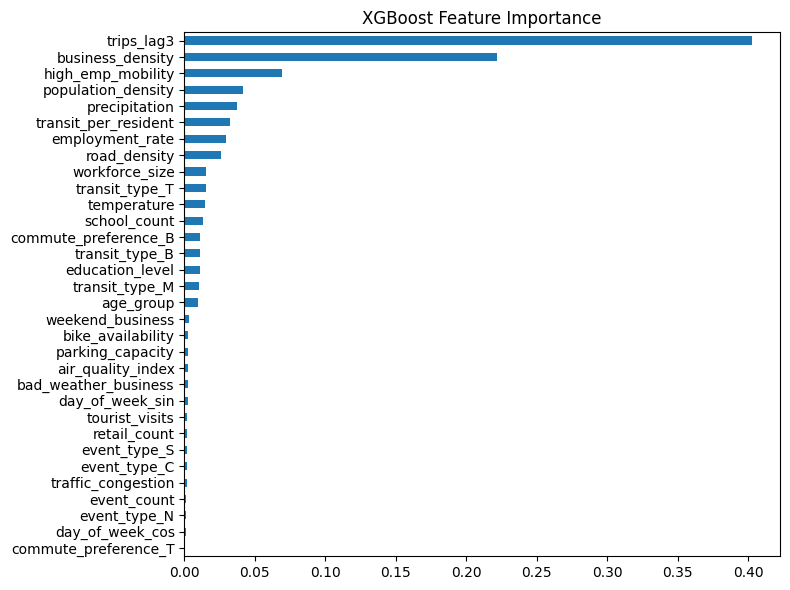

In [73]:
# Feature Importance: XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importance = xgb_importance.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
xgb_importance.plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

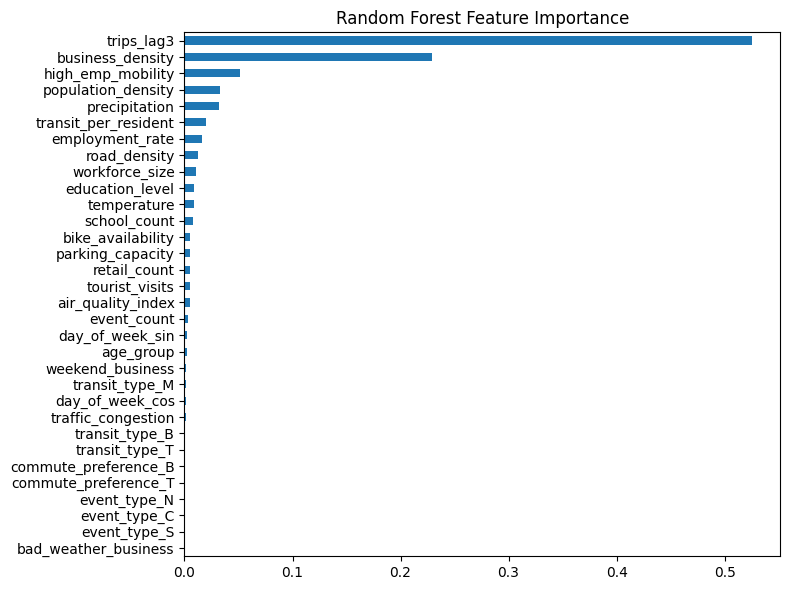

In [74]:
# Feature Importance: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_importance = rf_importance.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
rf_importance.plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


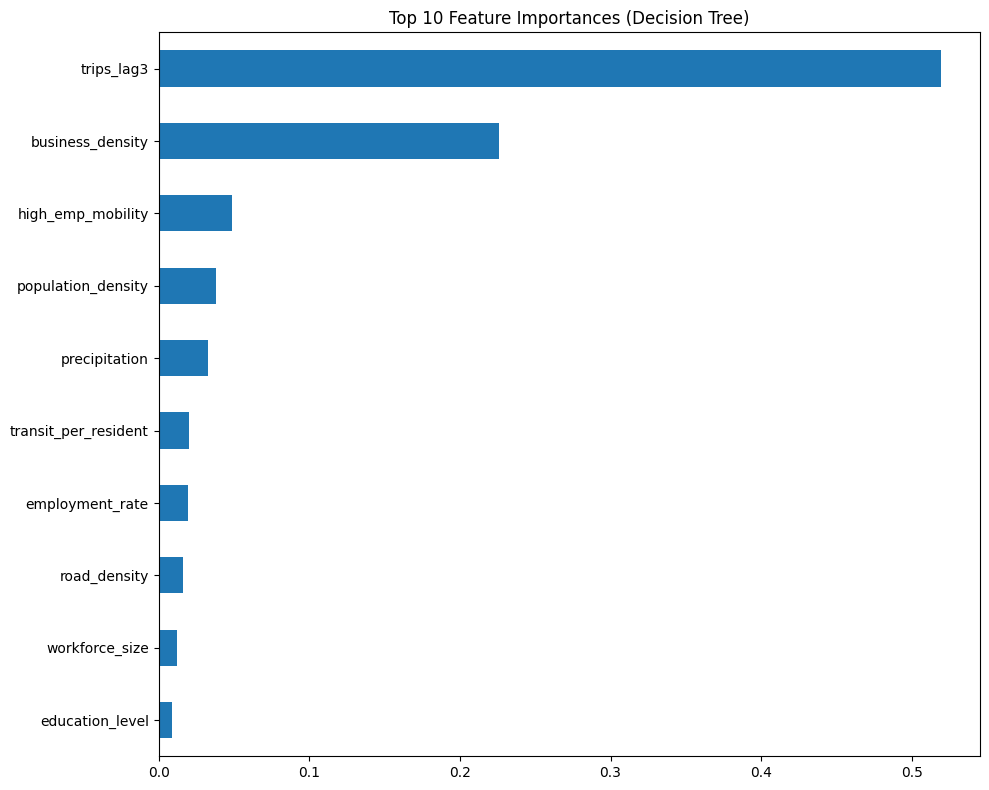

In [76]:
# Asumsikan X_train dan y_train sudah didefinisikan
dt_model = DecisionTreeRegressor(random_state=42) # Sebaiknya gunakan random_state untuk hasil yang konsisten
dt_model.fit(X_train, y_train)

# 💡 FIX: Gunakan .feature_importances_ bukan .coef_
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Untuk visualisasi yang lebih baik, tampilkan N fitur teratas saja
top_n = 10
dt_importance_top = dt_importance.nlargest(top_n).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
dt_importance_top.plot(kind='barh')
# 💡 FIX: Ganti judul plot agar sesuai
plt.title(f"Top {top_n} Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()

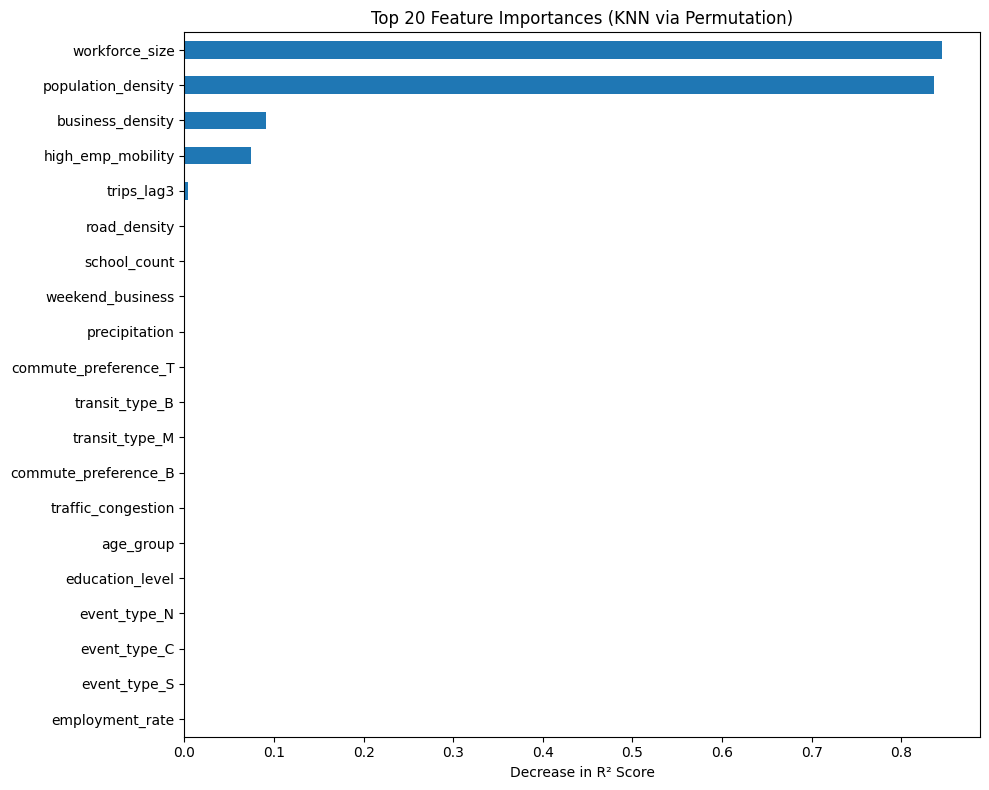

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# Asumsikan X_train, y_train, X_val, dan y_val sudah didefinisikan

# 1. Latih model KNN seperti biasa
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train, y_train)

# 2. Hitung permutation importance pada data validasi
#    Ini lebih baik daripada pada data training untuk menghindari bias
result = permutation_importance(
    knn_model,
    X_val,
    y_val,
    n_repeats=10,       # Ulangi 10 kali untuk hasil yang lebih stabil
    random_state=42,
    n_jobs=-1           # Gunakan semua core CPU untuk mempercepat
)

# 3. Buat Series dari hasil untuk di-plot
knn_importance = pd.Series(result.importances_mean, index=X_val.columns)

# 4. Plot N fitur teratas
top_n = 20
knn_importance_top = knn_importance.nlargest(top_n).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
knn_importance_top.plot(kind='barh')
plt.title(f"Top {top_n} Feature Importances (KNN via Permutation)")
plt.xlabel("Decrease in R² Score") # Atau metrik lain yang digunakan
plt.tight_layout()
plt.show()

In [99]:
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Latih XGBoost secara eksplisit dengan early stopping ---
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42,
    verbosity=0
)

xgb_model.fit(
    X_train, y_train,
)

# Simpan best iteration
best_n_estimators = getattr(xgb_model, "best_iteration", None)
if best_n_estimators is None:
    best_n_estimators = xgb_model.n_estimators

# Refit ulang XGB dengan jumlah boosting optimal di full training set (tanpa val)
xgb_best = XGBRegressor(
    n_estimators=best_n_estimators,
    learning_rate=0.05,
    max_depth=5,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42,
    verbosity=0
)
xgb_best.fit(X_train, y_train)

# --- 2. KNN model ---
knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights=lambda d: np.exp(-d / 5),
    metric='euclidean'
)

# --- 3. Stacking Regressor ---
stacker = StackingRegressor(
    estimators=[
        ('xgb', xgb_best),
        ('knn', knn_model)
    ],
    final_estimator=RidgeCV(alphas=np.logspace(-3, 3, 10)),
    n_jobs=-1,
    passthrough=False  # Gunakan hanya prediksi base models, tidak gabungkan dengan fitur asli
)

# --- 4. Fit stacking regressor ---
stacker.fit(X_train, y_train)

# --- 5. Evaluasi ---
y_pred = stacker.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"✅ RMSE Stacking (XGB + KNN): {rmse:.4f}")


✅ RMSE Stacking (XGB + KNN): 6.4083


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Learning Curve

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean s

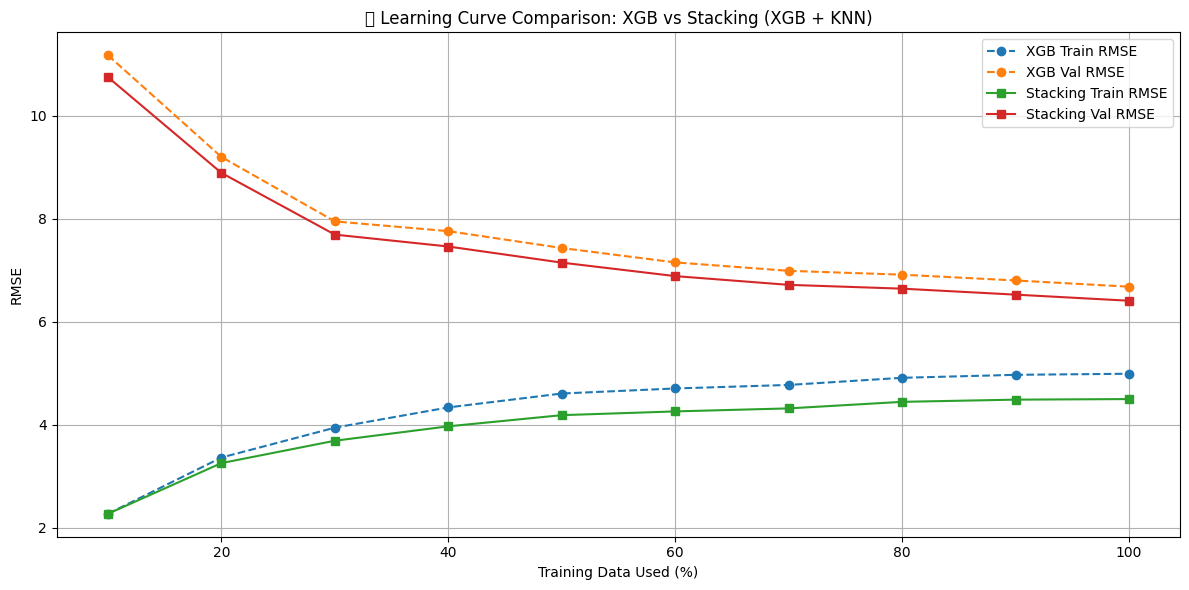

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

# --- Setup ---
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors_xgb = []
val_errors_xgb = []
train_errors_stack = []
val_errors_stack = []

for frac in train_sizes:
    cutoff = int(len(X_train) * frac)
    X_subset = X_train[:cutoff]
    y_subset = y_train[:cutoff]

    # --- 1. XGBoost ---
    xgb = XGBRegressor(
        n_estimators=best_n_estimators,
        learning_rate=0.05,
        max_depth=5,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42,
        verbosity=0
    )
    xgb.fit(X_subset, y_subset)

    y_pred_train_xgb = xgb.predict(X_subset)
    y_pred_val_xgb   = xgb.predict(X_val)

    train_errors_xgb.append(mean_squared_error(y_subset, y_pred_train_xgb, squared=False))
    val_errors_xgb.append(mean_squared_error(y_val, y_pred_val_xgb, squared=False))

    # --- 2. Stacking (XGB + KNN) ---
    knn = KNeighborsRegressor(
        n_neighbors=5,
        weights=lambda d: np.exp(-d / 5),
        metric='euclidean'
    )

    stacker = StackingRegressor(
        estimators=[
            ('xgb', xgb),
            ('knn', knn)
        ],
        final_estimator=RidgeCV(alphas=np.logspace(-3, 3, 10)),
        n_jobs=-1
    )
    stacker.fit(X_subset, y_subset)

    y_pred_train_stack = stacker.predict(X_subset)
    y_pred_val_stack   = stacker.predict(X_val)

    train_errors_stack.append(mean_squared_error(y_subset, y_pred_train_stack, squared=False))
    val_errors_stack.append(mean_squared_error(y_val, y_pred_val_stack, squared=False))

# --- Plotting ---
plt.figure(figsize=(12, 6))

# XGB
plt.plot(train_sizes * 100, train_errors_xgb, label="XGB Train RMSE", linestyle='--', marker='o')
plt.plot(train_sizes * 100, val_errors_xgb, label="XGB Val RMSE", linestyle='--', marker='o')

# STACKING
plt.plot(train_sizes * 100, train_errors_stack, label="Stacking Train RMSE", linestyle='-', marker='s')
plt.plot(train_sizes * 100, val_errors_stack, label="Stacking Val RMSE", linestyle='-', marker='s')

plt.xlabel("Training Data Used (%)")
plt.ylabel("RMSE")
plt.title("📊 Learning Curve Comparison: XGB vs Stacking (XGB + KNN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Re-Train

C:\Users\User\AppData\Local\Temp\ipykernel_19892\3226198372.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


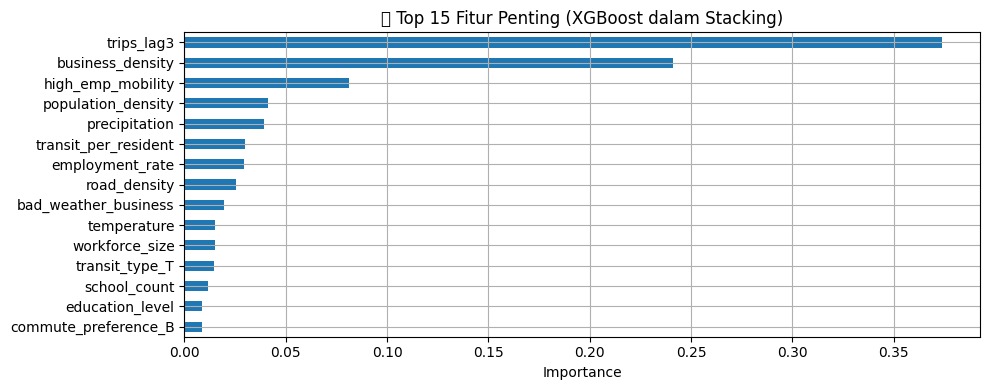

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

fi_series = pd.Series(xgb_best.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
fi_series.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("🔍 Top 15 Fitur Penting (XGBoost dalam Stacking)")
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


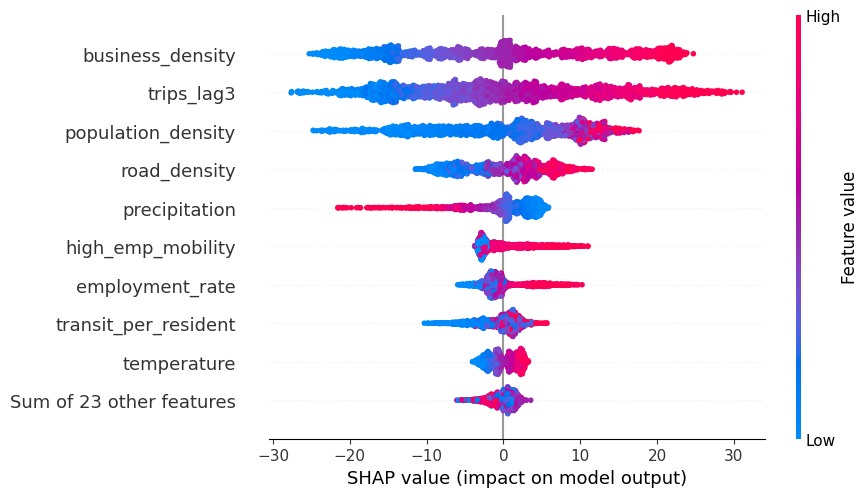

In [105]:
import shap
explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_val)

shap.plots.beeswarm(shap_values)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


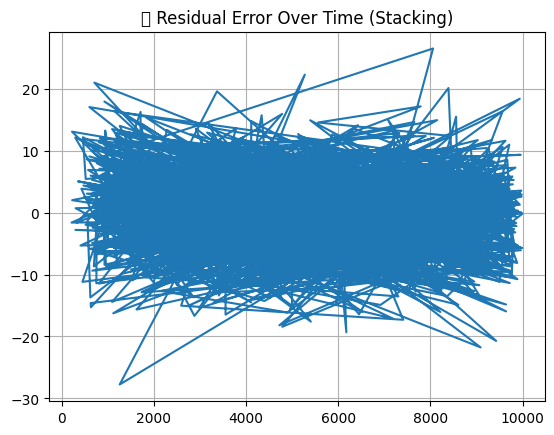

In [106]:
residuals = y_val - y_pred
plt.plot(residuals)
plt.title("📉 Residual Error Over Time (Stacking)")
plt.grid(True)
plt.show()


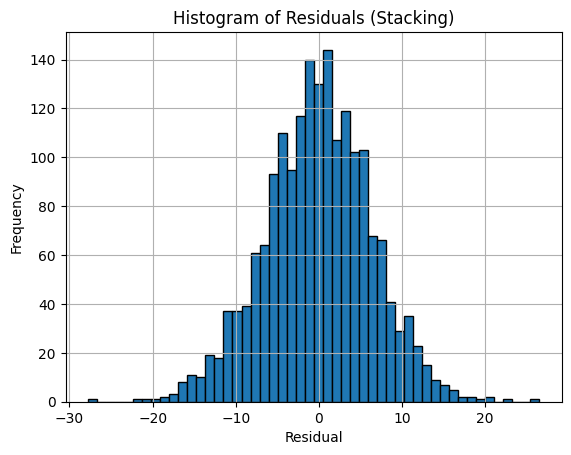

In [107]:
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Histogram of Residuals (Stacking)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


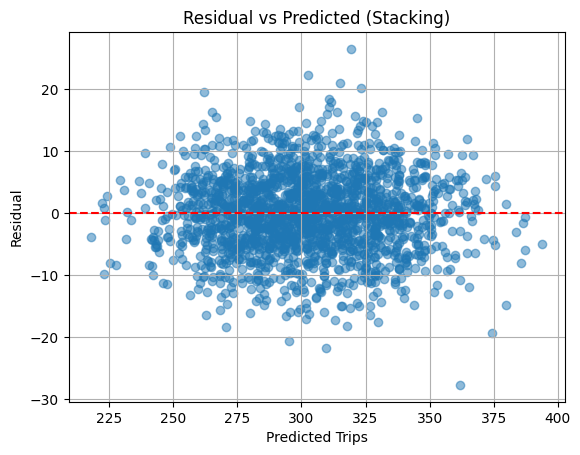

In [108]:
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Trips")
plt.ylabel("Residual")
plt.title("Residual vs Predicted (Stacking)")
plt.grid(True)
plt.show()

In [109]:
top_features = [
    'trips_lag3', 'business_density', 'high_emp_mobility', 'population_density',
    'precipitation', 'transit_per_resident', 'employment_rate', 'road_density',
    'bad_weather_business', 'temperature'
]

X_train_top = X_train[top_features]
X_val_top = X_val[top_features]

In [111]:
# XGBRegressor
xgb_model_top = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42,
    verbosity=0
)
xgb_model_top.fit(X_train_top, y_train)

# KNN
knn_model_top = KNeighborsRegressor(
    n_neighbors=5,
    weights=lambda d: np.exp(-d / 5),
    metric='euclidean'
)

# Meta learner: RidgeCV
meta_model = RidgeCV(alphas=np.logspace(-3, 3, 10))

# Stacking Regressor
stacker_top = StackingRegressor(
    estimators=[
        ('xgb', xgb_model_top),
        ('knn', knn_model_top)
    ],
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=False  # atau True jika ingin tambah fitur asli ke meta model
)

# Train stacker
stacker_top.fit(X_train_top, y_train)

# Prediksi dan evaluasi
y_pred_top = stacker_top.predict(X_val_top)
rmse_top = mean_squared_error(y_val, y_pred_top, squared=False)
print(f"✅ RMSE Stacking (Top-10 Features): {rmse_top:.4f}")


✅ RMSE Stacking (Top-10 Features): 6.3939


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [118]:
from sklearn.linear_model import LassoCV

stacker = StackingRegressor(
    estimators=[('xgb', xgb_best), ('knn', knn_model)],
    final_estimator=LassoCV(cv=5),
    passthrough=True,
    n_jobs=-1
)


In [119]:
# Pastikan model xgb_best dan knn_model sudah terlatih
stacker.fit(X_train_top, y_train)

y_pred_lasso = stacker.predict(X_val_top)
rmse_lasso = mean_squared_error(y_val, y_pred_lasso, squared=False)
print(f"✅ RMSE Stacking (LassoCV + passthrough): {rmse_lasso:.4f}")


✅ RMSE Stacking (LassoCV + passthrough): 6.2033


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

# --- Setup ---
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors_xgb = []
val_errors_xgb = []
train_errors_stack = []
val_errors_stack = []

for frac in train_sizes:
    cutoff = int(len(X_train_top) * frac)
    X_subset = X_train_top[:cutoff]
    y_subset = y_train[:cutoff]

    # --- 1. XGBoost ---
    xgb = XGBRegressor(
        n_estimators=best_n_estimators,
        learning_rate=0.05,
        max_depth=5,
        reg_alpha=1,
        reg_lambda=1,
        random_state=42,
        verbosity=0
    )
    xgb.fit(X_subset, y_subset)

    y_pred_train_xgb = xgb.predict(X_subset)
    y_pred_val_xgb   = xgb.predict(X_val_top)

    train_errors_xgb.append(mean_squared_error(y_subset, y_pred_train_xgb, squared=False))
    val_errors_xgb.append(mean_squared_error(y_val, y_pred_val_xgb, squared=False))

    # --- 2. Stacking (XGB + KNN) ---
    knn = KNeighborsRegressor(
        n_neighbors=5,
        weights=lambda d: np.exp(-d / 5),
        metric='euclidean'
    )

    stacker = StackingRegressor(
        estimators=[('xgb', xgb_best), ('knn', knn_model)],
        final_estimator=LassoCV(cv=5),
        passthrough=True,
        n_jobs=-1
    )
    stacker.fit(X_subset, y_subset)

    y_pred_train_stack = stacker.predict(X_subset)
    y_pred_val_stack   = stacker.predict(X_val)

    train_errors_stack.append(mean_squared_error(y_subset, y_pred_train_stack, squared=False))
    val_errors_stack.append(mean_squared_error(y_val, y_pred_val_stack, squared=False))

# --- Plotting ---
plt.figure(figsize=(12, 6))

# XGB
plt.plot(train_sizes * 100, train_errors_xgb, label="XGB Train RMSE", linestyle='--', marker='o')
plt.plot(train_sizes * 100, val_errors_xgb, label="XGB Val RMSE", linestyle='--', marker='o')

# STACKING
plt.plot(train_sizes * 100, train_errors_stack, label="Stacking Train RMSE", linestyle='-', marker='s')
plt.plot(train_sizes * 100, val_errors_stack, label="Stacking Val RMSE", linestyle='-', marker='s')

plt.xlabel("Training Data Used (%)")
plt.ylabel("RMSE")
plt.title("📊 Learning Curve Comparison: XGB vs Stacking (XGB + KNN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: feature_names mismatch: ['trips_lag3', 'business_density', 'high_emp_mobility', 'population_density', 'precipitation', 'transit_per_resident', 'employment_rate', 'road_density', 'bad_weather_business', 'temperature'] ['business_density', 'retail_count', 'event_count', 'tourist_visits', 'traffic_congestion', 'air_quality_index', 'temperature', 'precipitation', 'education_level', 'school_count', 'age_group', 'employment_rate', 'workforce_size', 'bike_availability', 'parking_capacity', 'road_density', 'event_type_C', 'event_type_N', 'event_type_S', 'commute_preference_B', 'commute_preference_T', 'transit_type_B', 'transit_type_M', 'transit_type_T', 'day_of_week_sin', 'day_of_week_cos', 'bad_weather_business', 'transit_per_resident', 'trips_lag3', 'weekend_business', 'high_emp_mobility', 'population_density']
training data did not have the following fields: traffic_congestion, school_count, day_of_week_cos, event_type_N, age_group, commute_preference_B, weekend_business, event_count, event_type_S, parking_capacity, commute_preference_T, day_of_week_sin, tourist_visits, retail_count, air_quality_index, education_level, transit_type_T, transit_type_M, event_type_C, workforce_size, bike_availability, transit_type_B

### Submission

In [59]:
X_test = df_test[selected_features] 
y_test_pred = best_xgb.predict(X_test)

In [61]:
df_test_raw = pd.read_csv("mobility_test.csv")
submission = pd.DataFrame({
    "ID": df_test_raw["ID"],
    "trips_thousands": y_test_pred
})

In [62]:
submission.to_csv("submission3.csv", index=False)

In [63]:
print(submission.head())
print(submission.shape)  # Harus 2000 rows x 2 kolom

       ID  trips_thousands
0  ID0001       302.237274
1  ID0002       306.083191
2  ID0003       330.382050
3  ID0004       316.759094
4  ID0005       250.160202
(2000, 2)
